In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl

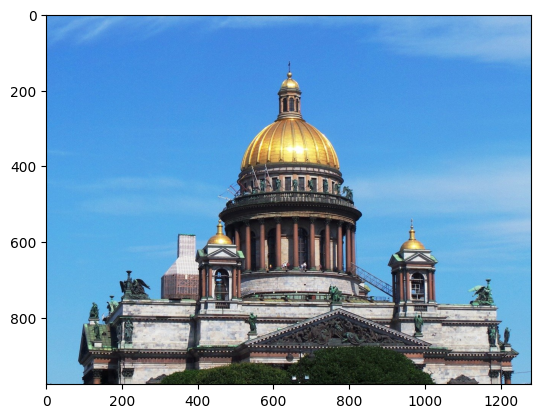

In [2]:
img = cv2.imread("/home/tuandinh/Desktop/Computer Vision ITMO/Week1/architecture-995613_1280.jpg")
img_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_original)
plt.show()

In [3]:
print("высота:", img_original.shape[0], "ширина:", img_original.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_original))

высота: 976 ширина: 1280
среднее значение интенсивности пикселя: 140.9997785391052


# Thay đổi độ phơi sáng theo cách thủ công
Применим к каждому пикселю преобразование, задаваемое следующим образом: $I(out) = I(in) \cdot 2^p$, где $p$ - некоторый параметр из $[-1,1]$. Пусть, скажем, $p = 0.8$.

In [4]:
def exposure(image, p):
    return image.copy() * (2 ** p)

img_result = exposure(img_original, -0.43)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


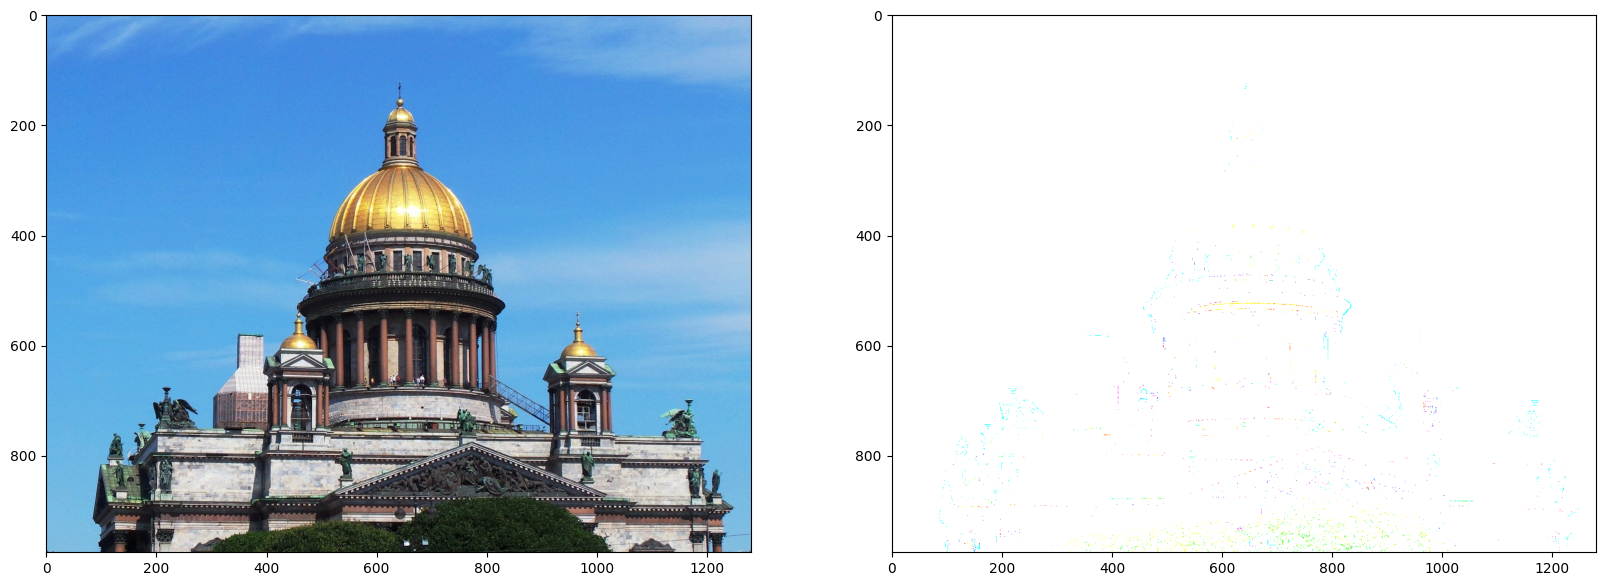

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result)

In [6]:
img_result[50][50]

array([ 64.57677532, 114.30831494, 166.26663991])

Если мы попытаемся избавиться только от первой проблемы, то изображение мы получим, но совсем не то, которое хотели:

In [7]:
def exposure(image, p):
    img_result = image.copy()
    for i in range(0, img_result.shape[0]):
      for j in range(0, img_result.shape[1]):
        img_result[i,j] = (round(img_result[i,j][0]*2**p,0),round(img_result[i,j][1]*2**p,0),round(img_result[i,j][2]*2**p,0))
    return img_result

img_result = exposure(img_original, -0.43) 

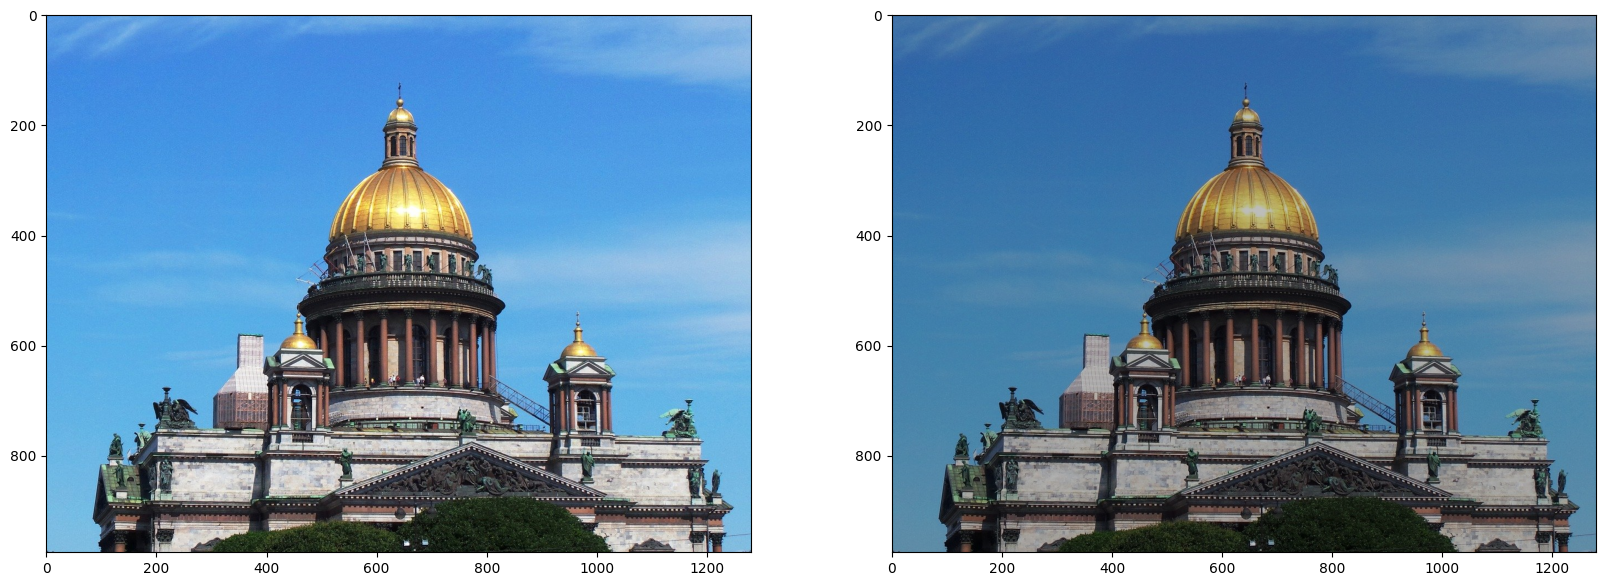

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result)

Логичным кажется следующее решение. Нецелые значения будем округлять, а значения, превосходящие 255, будем считать равными 255. Проверим, что это нам даст.

In [22]:
def exposure(image, p):
    img_result = np.round(image.copy() * (2 ** p),0)
    img_result = img_result.astype(int)
    for i in range(img_result.shape[0]):
      for j in range(img_result.shape[1]): 
        for k in range(img_result.shape[2]):
          if img_result[i][j][k] > 255:
            img_result[i][j][k] = 255
    return img_result


img_result = exposure(img_original, 0.28)

In [23]:
img_result[50][50]

array([106, 187, 255])

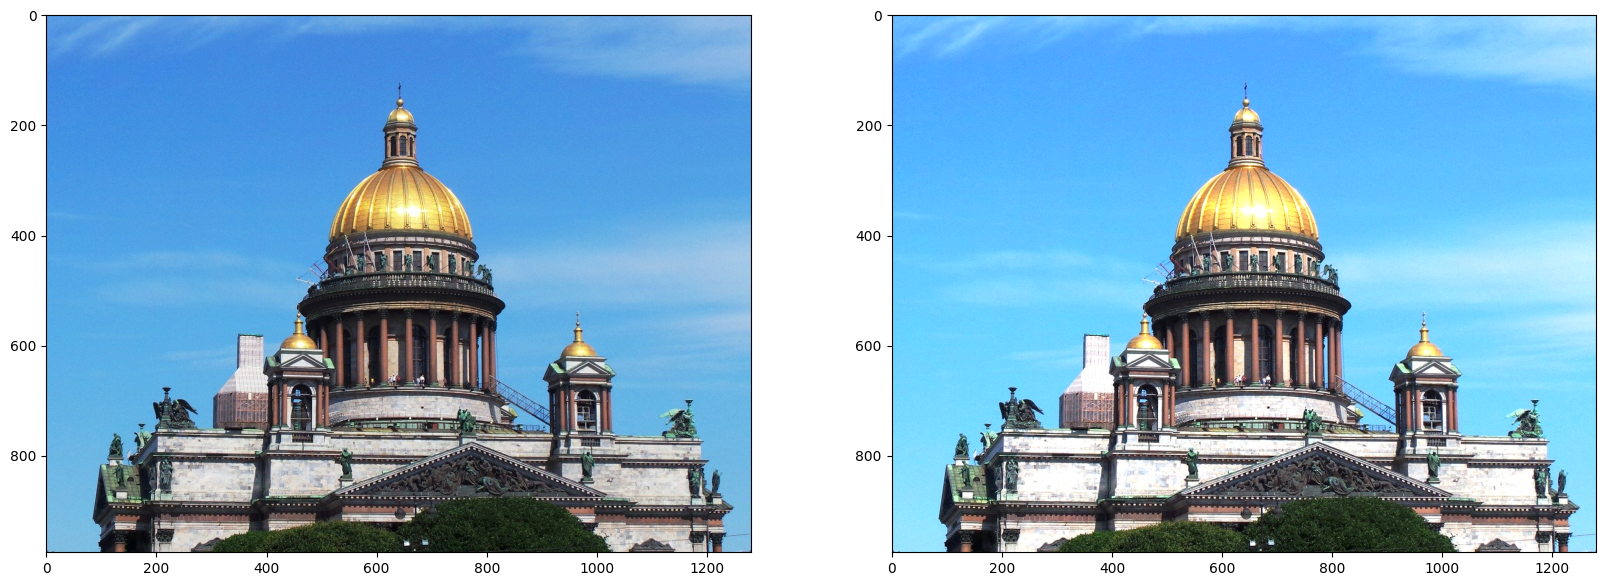

In [24]:
ig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result)

In [25]:
print("Среднее значение интенсивности пикселя исходного изображения:", np.mean(img_original))
print("Среднее значение интенсивности пикселя модифицированного изображения:", np.mean(img_result))

Среднее значение интенсивности пикселя исходного изображения: 140.9997785391052
Среднее значение интенсивности пикселя модифицированного изображения: 165.60277813353824


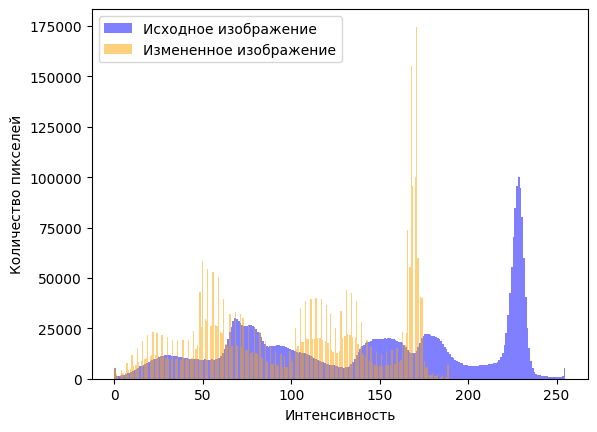

In [13]:
plt.hist(img_original.ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.hist(img_result.ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.legend(['Исходное изображение', 'Измененное изображение'])
plt.xlabel('Интенсивность')
plt.ylabel('Количество пикселей')
plt.show()

Hinh anh thay doi lich thuoc sang ben trai vao vung toi hon

# Изменение экспозиции при помощи библиотеки

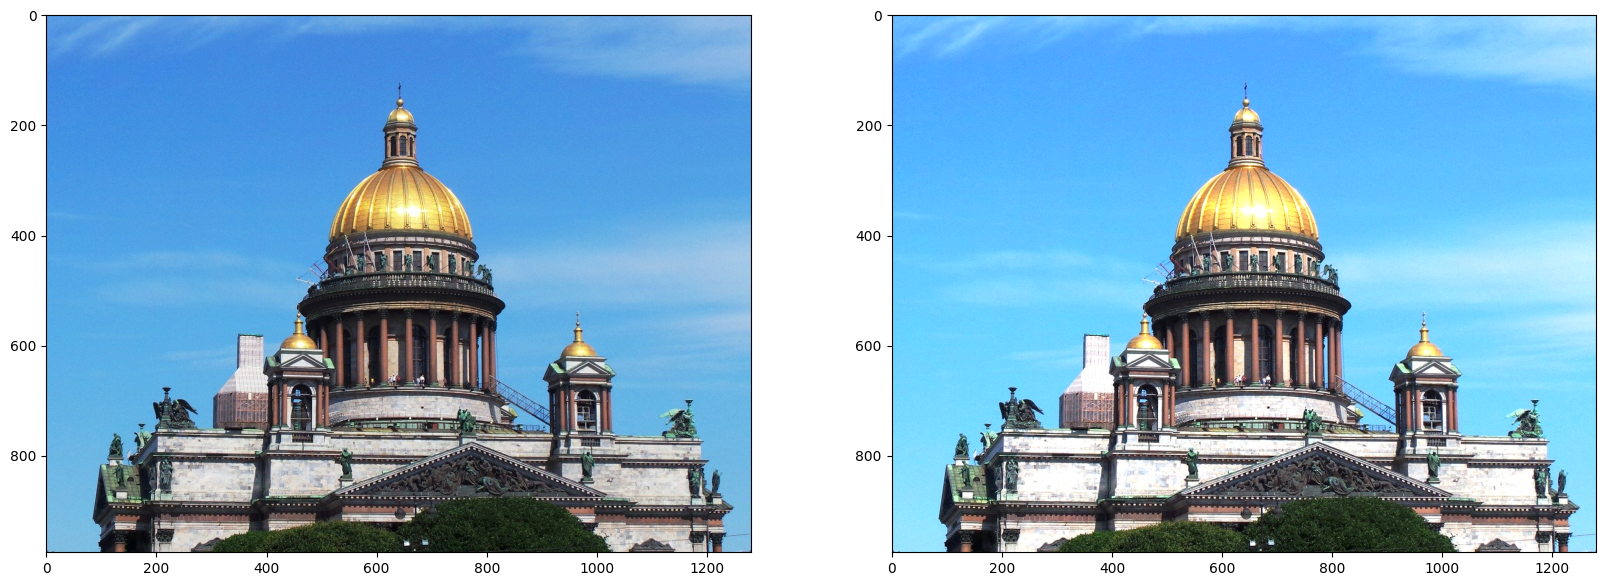

In [20]:
def exposure(image, p):
    return image.copy() * (2 ** p)

#Преобразование
img_result_lib = exposure(img_original, 0.28)
#Сохранение в файл
cv2.imwrite("img_result_lib.png", img_result_lib)
#Чтение из файла
img_result_lib = cv2.imread("/home/tuandinh/Desktop/Computer Vision ITMO/Week1/img_result_lib.png")


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result_lib)

In [21]:
print("Среднее значение интенсивности пикселя изображения, измененного вручную:", np.mean(img_result))
print("Среднее значение интенсивности пикселя изображения, измененного библиотекой:", np.mean(img_result_lib))

Среднее значение интенсивности пикселя изображения, измененного вручную: 104.64492347592213
Среднее значение интенсивности пикселя изображения, измененного библиотекой: 165.60277813353824


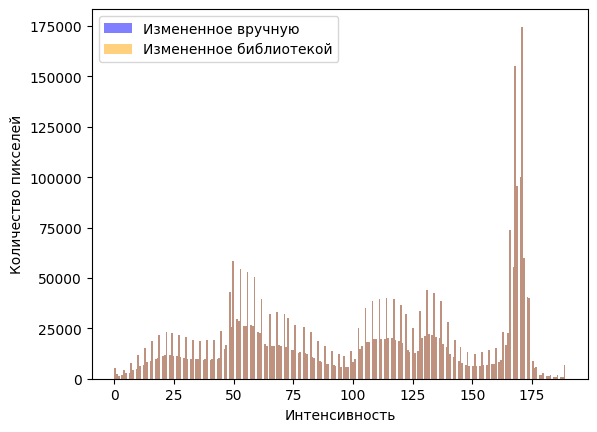

In [19]:
plt.hist(img_result_lib.ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.hist(img_result.ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.legend(['Измененное вручную', 'Измененное библиотекой'])
plt.xlabel('Интенсивность')
plt.ylabel('Количество пикселей')
plt.show()

In [ ]:
flag = True
for i in range(img_result.shape[0]):
      for j in range(img_result.shape[1]): 
        for k in range(img_result.shape[2]):
          if (img_result[i][j][k] != img_result_lib[i][j][k]):
            flag = False
if flag == True:
  print('Результаты полностью совпали!')
else:
  print('Результаты не совпали!')

In [28]:
def exposure(image, p):
    img_result = np.round(image.copy() * (2 ** p),0)
    img_result = img_result.astype(int)
    for i in range(img_result.shape[0]):
      for j in range(img_result.shape[1]): 
        for k in range(img_result.shape[2]):
          values = img_result[i][j][k]/255
          if values > 1:
            img_result[i][j][k] = 1
          if values == 0:
            img_result[i][j][k] = 0

    return img_result


img_result = exposure(img_original, 0.28)

In [29]:
print("Среднее значение интенсивности пикселя изображения, измененного вручную:", np.mean(img_result))
print("Среднее значение интенсивности пикселя изображения, измененного библиотекой:", np.mean(img_result_lib))

Среднее значение интенсивности пикселя изображения, измененного вручную: 100.24405310792349
Среднее значение интенсивности пикселя изображения, измененного библиотекой: 165.60277813353824
